In [1]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random


def get_column(data, index):
	# your code here ****************************
	result = [row[index] for row in data]
	return result


def prepare_data(file_name_dataset):
	data = np.genfromtxt(file_name_dataset, delimiter = ',', skip_header = 1).tolist()
	N = len(data)

	# get tv ( index =0)
	tv_data = get_column(data, 0)

	# get radio ( index =1)
	radio_data = get_column(data, 1)

	# get newspaper ( index =2)
	newspaper_data = get_column(data, 2)

	# get sales ( index =3)
	sales_data = get_column(data, 3)

	# building X input and y output for training
	X = [tv_data, radio_data, newspaper_data]
	y = sales_data
	return X, y

In [11]:
def initialize_params():
	w1 = random.gauss(mu = 0.0, sigma = 0.01)
	w2 = random.gauss(mu = 0.0, sigma = 0.01)
	w3 = random.gauss(mu = 0.0, sigma = 0.01)
	b = 0
	return w1, w2, w3, b

# def initialize_params():
# 	w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
# 	return w1, w2, w3, b

In [3]:
def predict(x1, x2, x3, w1, w2, w3, b):
	# your code here ****************************
	result = x1 * w1 + x2 * w2 + x3 * w3 + b
	return result

In [4]:
def compute_loss(y_hat, y):
	loss = (y_hat - y) ** 2
	return loss

In [6]:
def compute_loss_mse(y_hat, y):
	loss = (y_hat - y) ** 2
	return loss

In [5]:
# compute gradient
def compute_gradient_wi(xi, y, y_hat):
	# your code here ****************************
	dl_dwi = 2 * xi * (y_hat - y)
	return dl_dwi


def compute_gradient_b(y, y_hat):
	# your code here ****************************
	dl_db = 2 * (y_hat - y)
	return dl_db

In [7]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max = 50, lr = 1e-5):
	losses = []

	# Initialize weights and bias
	w1, w2, w3, b = initialize_params()  # Giả sử hàm này khởi tạo các trọng số và bias
	N = len(y_data)  # Số lượng mẫu trong tập dữ liệu

	for epoch in range(epoch_max):
		loss_total = 0.0
		dw1_total = 0.0
		dw2_total = 0.0
		dw3_total = 0.0
		db_total = 0.0

		# Duyệt qua từng mẫu dữ liệu
		for i in range(N):
			# Lấy một mẫu dữ liệu
			x1 = X_data[0][i]
			x2 = X_data[1][i]
			x3 = X_data[2][i]
			y = y_data[i]

			# Tính toán giá trị dự đoán
			y_hat = predict(x1, x2, x3, w1, w2, w3, b)  # Hàm predict trả về y_hat

			# Tính toán loss
			loss = compute_loss_mse(y, y_hat)  # Hàm compute_loss tính MSE hoặc loss khác

			# Tích lũy loss
			loss_total += loss  # Cộng dồn loss vào tổng loss

			# Tính toán gradient cho các trọng số và bias
			dl_dw1 = compute_gradient_wi(x1, y, y_hat)  # Gradient của w1
			dl_dw2 = compute_gradient_wi(x2, y, y_hat)  # Gradient của w2
			dl_dw3 = compute_gradient_wi(x3, y, y_hat)  # Gradient của w3
			dl_db = compute_gradient_b(y, y_hat)  # Gradient của bias

			# Tích lũy gradient cho mỗi tham số
			dw1_total += dl_dw1
			dw2_total += dl_dw2
			dw3_total += dl_dw3
			db_total += dl_db

		# Sau khi xử lý N mẫu, cập nhật trọng số và bias
		w1 -= lr * (dw1_total / N)  # Cập nhật w1
		w2 -= lr * (dw2_total / N)  # Cập nhật w2
		w3 -= lr * (dw3_total / N)  # Cập nhật w3
		b -= lr * (db_total / N)  # Cập nhật bias

		# Ghi lại loss trung bình cho epoch hiện tại
		losses.append(loss_total / N)

		# Log thông tin quá trình huấn luyện
		print(f"Epoch [{epoch + 1}/{epoch_max}], Loss: {loss_total / N:.4f}")

	return (w1, w2, w3, b, losses)

Epoch [1/1000], Loss: 172.9840
Epoch [2/1000], Loss: 39.4082
Epoch [3/1000], Loss: 18.1575
Epoch [4/1000], Loss: 14.6346
Epoch [5/1000], Loss: 13.9139
Epoch [6/1000], Loss: 13.6400
Epoch [7/1000], Loss: 13.4414
Epoch [8/1000], Loss: 13.2591
Epoch [9/1000], Loss: 13.0838
Epoch [10/1000], Loss: 12.9138
Epoch [11/1000], Loss: 12.7488
Epoch [12/1000], Loss: 12.5885
Epoch [13/1000], Loss: 12.4329
Epoch [14/1000], Loss: 12.2817
Epoch [15/1000], Loss: 12.1349
Epoch [16/1000], Loss: 11.9922
Epoch [17/1000], Loss: 11.8537
Epoch [18/1000], Loss: 11.7191
Epoch [19/1000], Loss: 11.5883
Epoch [20/1000], Loss: 11.4612
Epoch [21/1000], Loss: 11.3377
Epoch [22/1000], Loss: 11.2176
Epoch [23/1000], Loss: 11.1010
Epoch [24/1000], Loss: 10.9876
Epoch [25/1000], Loss: 10.8774
Epoch [26/1000], Loss: 10.7703
Epoch [27/1000], Loss: 10.6662
Epoch [28/1000], Loss: 10.5649
Epoch [29/1000], Loss: 10.4665
Epoch [30/1000], Loss: 10.3707
Epoch [31/1000], Loss: 10.2776
Epoch [32/1000], Loss: 10.1871
Epoch [33/1000],

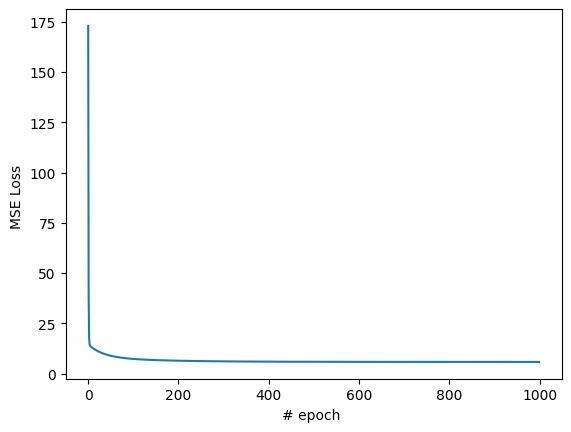

In [9]:
X, y = prepare_data('../../../data/module4/week1/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y,
                                                               epoch_max = 1000, lr = 1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("# epoch ")
plt.ylabel("MSE Loss ")
plt.show()

In [12]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max = 1000, lr = 1e-5)

print(w1, w2, w3)

Epoch [1/1000], Loss: 414.2094
Epoch [2/1000], Loss: 77.7495
Epoch [3/1000], Loss: 24.4853
Epoch [4/1000], Loss: 15.9091
Epoch [5/1000], Loss: 14.3888
Epoch [6/1000], Loss: 13.9866
Epoch [7/1000], Loss: 13.7655
Epoch [8/1000], Loss: 13.5775
Epoch [9/1000], Loss: 13.3991
Epoch [10/1000], Loss: 13.2265
Epoch [11/1000], Loss: 13.0590
Epoch [12/1000], Loss: 12.8962
Epoch [13/1000], Loss: 12.7381
Epoch [14/1000], Loss: 12.5845
Epoch [15/1000], Loss: 12.4352
Epoch [16/1000], Loss: 12.2902
Epoch [17/1000], Loss: 12.1493
Epoch [18/1000], Loss: 12.0123
Epoch [19/1000], Loss: 11.8791
Epoch [20/1000], Loss: 11.7497
Epoch [21/1000], Loss: 11.6239
Epoch [22/1000], Loss: 11.5017
Epoch [23/1000], Loss: 11.3828
Epoch [24/1000], Loss: 11.2672
Epoch [25/1000], Loss: 11.1548
Epoch [26/1000], Loss: 11.0454
Epoch [27/1000], Loss: 10.9391
Epoch [28/1000], Loss: 10.8357
Epoch [29/1000], Loss: 10.7352
Epoch [30/1000], Loss: 10.6373
Epoch [31/1000], Loss: 10.5421
Epoch [32/1000], Loss: 10.4495
Epoch [33/1000],